In [24]:
import pandas as pd

In [25]:
df=pd.read_csv(r"C:\Users\Danish Hussain\Music\end to end projects\titanic dataset preprocessing\titanic_data.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
df=df[["survived","pclass","sex","age","fare","class","who","deck","alive","alone"]]

In [27]:
df.head()

,survived,pclass,sex,age,fare,class,who,deck,alive,alone
0,0,3,male,22.0,7.2500,Third,man,NaN,no,False
1,1,1,female,38.0,71.2833,First,woman,C,yes,False
2,1,3,female,26.0,7.9250,Third,woman,NaN,yes,True
3,1,1,female,35.0,53.1000,First,woman,C,yes,False
4,0,3,male,35.0,8.0500,Third,man,NaN,no,True


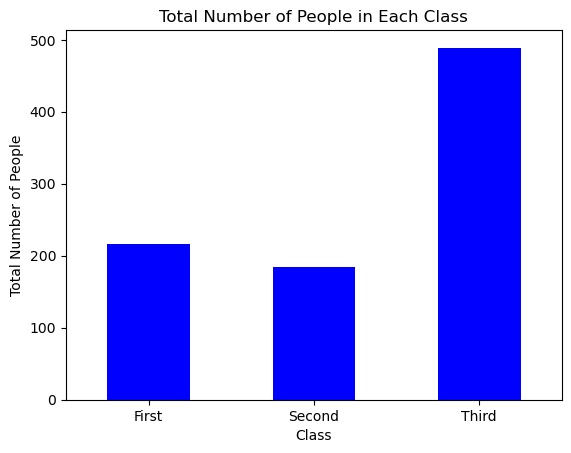

In [38]:
total_by_class = df.groupby('class').size()

# Plotting the data
total_by_class.plot(kind='bar', color='blue')
plt.title('Total Number of People in Each Class')
plt.xlabel('Class')
plt.ylabel('Total Number of People')
plt.xticks(rotation=0)
plt.show()

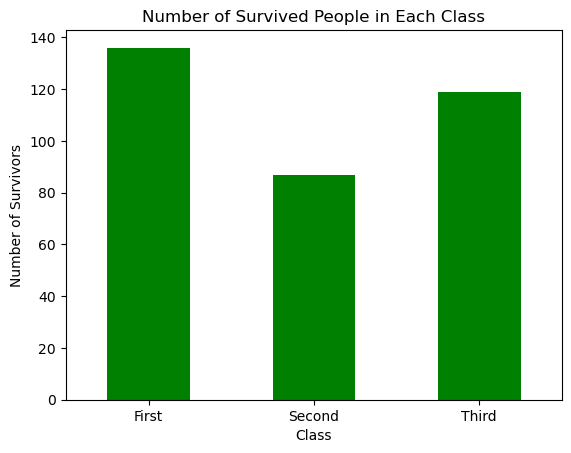

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


survived_by_class = df[df['survived'] == 1].groupby('class').size()

# Plotting the data
survived_by_class.plot(kind='bar', color='green')
plt.title('Number of Survived People in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()


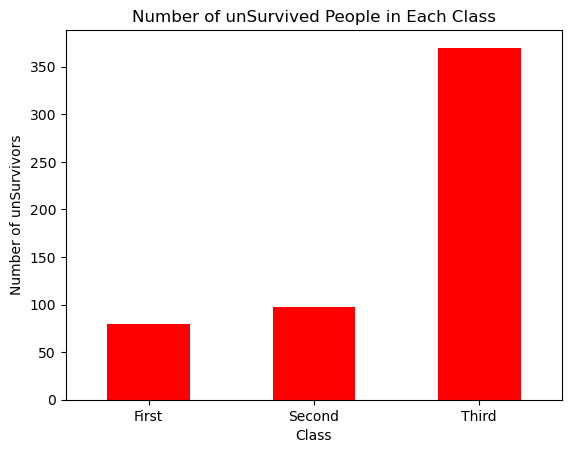

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


survived_by_class = df[df['survived'] == 0].groupby('class').size()

# Plotting the data
survived_by_class.plot(kind='bar', color='red')
plt.title('Number of unSurvived People in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of unSurvivors')
plt.xticks(rotation=0)
plt.show()

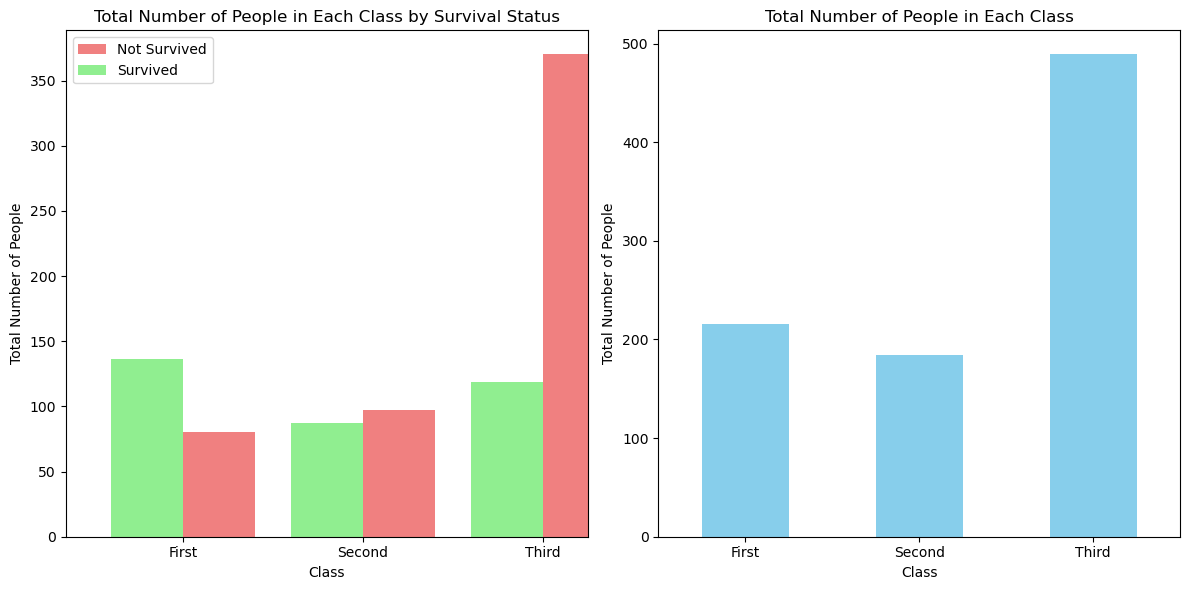

In [47]:
# Grouping by class and survival status, and calculating the total number of people in each group
grouped = df.groupby(['class', 'survived']).size().unstack(fill_value=0)

# Plotting the data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the total number of unsurvived people in each class
grouped[0].plot(kind='bar', ax=ax[0], color='lightcoral', width=0.4, position=0, label='Not Survived')
# Plotting the total number of survived people in each class
grouped[1].plot(kind='bar', ax=ax[0], color='lightgreen', width=0.4, position=1, label='Survived')

# Setting titles and labels for the first plot
ax[0].set_title('Total Number of People in Each Class by Survival Status')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Total Number of People')
ax[0].set_xticklabels(grouped.index, rotation=0)
ax[0].legend()

# Plotting the total number of people in each class
total_by_class = df.groupby('class').size()
total_by_class.plot(kind='bar', ax=ax[1], color='skyblue')

# Setting titles and labels for the second plot
ax[1].set_title('Total Number of People in Each Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Total Number of People')
ax[1].set_xticklabels(total_by_class.index, rotation=0)

plt.tight_layout()
plt.show()


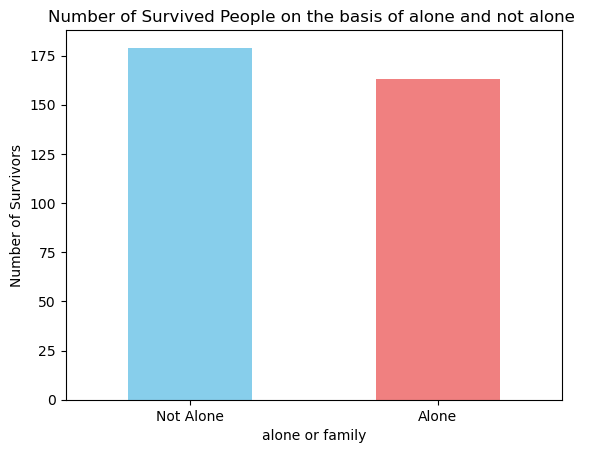

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


survived_by_alone = df[df['survived'] == 1].groupby('alone').size()


# Plotting the data
colors = ['skyblue', 'lightcoral']  # specifying different colors for each bar
survived_by_alone.plot(kind='bar', color=colors)
plt.title('Number of Survived People on the basis of alone and not alone ')
plt.xlabel('alone or family')
plt.ylabel('Number of Survivors')
plt.xticks([0, 1], ['Not Alone', 'Alone'], rotation=0) 
plt.show()

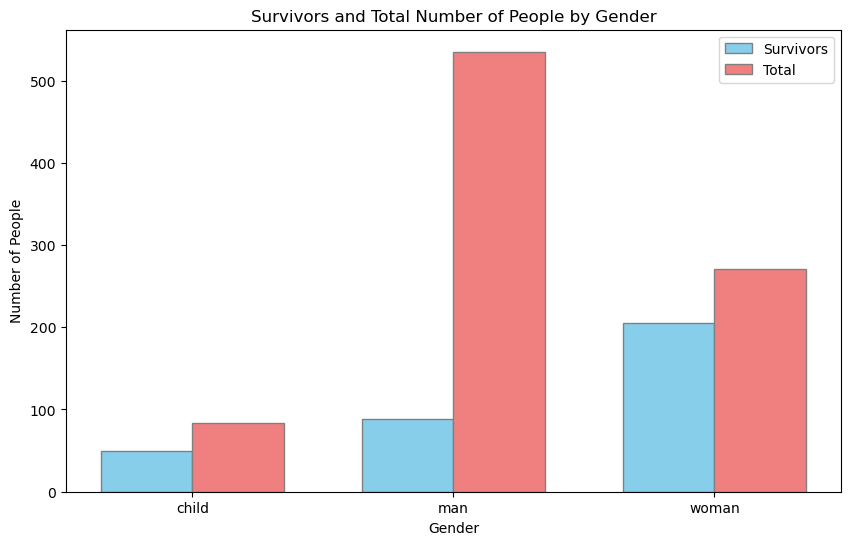

In [58]:
# Grouping by gender and survival status
survived_by_alone = df[df['survived'] == 1].groupby('who').size()
total_by_gender = df.groupby('who').size()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))  # creating a single plot

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(survived_by_alone))
r2 = [x + bar_width for x in r1]

# Plotting bars
ax.bar(r1, survived_by_alone, color='skyblue', width=bar_width, edgecolor='grey', label='Survivors')
ax.bar(r2, total_by_gender, color='lightcoral', width=bar_width, edgecolor='grey', label='Total')

# Adding labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_title('Survivors and Total Number of People by Gender')
ax.set_xticks([r + bar_width/2 for r in range(len(survived_by_alone))])
ax.set_xticklabels(survived_by_alone.index)
ax.legend()

plt.show()
